In [2]:
%pip install opendatasets
# %pip install panda
# %pip install tensorflow
# %pip install keras

import opendatasets as od
import pandas

In [3]:
import tensorflow as tf
from keras import *
import numpy as np
import seaborn as sns
import cv2
from sklearn.metrics import *
import os
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
od.download("https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria/download?datasetVersionNumber=1")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: c0drix
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria


100%|██████████| 675M/675M [00:08<00:00, 81.4MB/s]


In [5]:
import tensorflow as tf
from keras import *
import numpy as np
import seaborn as sns
import cv2
from sklearn.metrics import *
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt

In [6]:
def get_image(path, img_size ):
    img = np.array(tf.keras.utils.load_img(
        path,
        color_mode='rgb',
        target_size = img_size,
        interpolation ='nearest',
        keep_aspect_ratio = False
    ))
    return img

In [7]:
folder_path1 = r"/content/cell-images-for-detecting-malaria/cell_images/Parasitized"
folder_path2 = r"/content/cell-images-for-detecting-malaria/cell_images/Uninfected"
def load_images(folder_path, img_size):
    images_names = os.listdir(folder_path)
    X = np.zeros((7000, *img_size))
    for i, img_name in enumerate(images_names ):
        if i > 6999:
          break
        try:

            img_path = os.path.join(folder_path, img_name)
            img_array = get_image(img_path, img_size)
            X[i] = img_array
        except:
            X[i] = X[i - 1]
    return X / 255.0

cls1 = load_images(folder_path1, (64, 64, 3))
cls2 = load_images(folder_path2, (64, 64, 3))
cls1.shape, cls2.shape



((7000, 64, 64, 3), (7000, 64, 64, 3))

In [8]:
def show_images(images, labels):
    for i in range(15):
        plt.subplot(3, 5, i + 1)
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

In [9]:
label1 = np.ones(len(cls1),)
label2 = np.zeros(len(cls2),)
label1.shape, label2.shape

((7000,), (7000,))

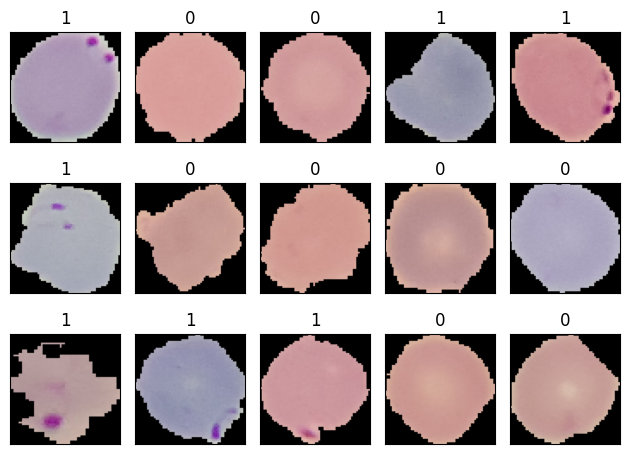

((9520, 64, 64, 3),
 (2800, 64, 64, 3),
 (1680, 64, 64, 3),
 (9520,),
 (2800,),
 (1680,))

In [10]:
X = np.concatenate([cls1, cls2], axis = 0)
y = np.concatenate([label1, label2], axis = 0)

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

show_images(X_val, y_val)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape , y_val.shape

In [11]:
X_train = X_train.reshape(9520, 64 * 64 * 3)
X_test = X_test.reshape(2800, 64 * 64 * 3)
X_train.shape, X_test.shape

((9520, 12288), (2800, 12288))

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

y_pred

In [27]:
rf = RandomForestClassifier(n_estimators=120)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [28]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7878571428571428

In [29]:
f1score = f1_score(y_test, y_pred)
f1score

0.7908450704225353